# ANLP 2019 - Assignment 4


*Rodrigo Lopez Portillo Alcocer, 805606* (enter your name/student id number here)

<div class="alert alert-block alert-danger">Due: Wednesday, December 18, 4pm</div>

<div class="alert alert-block alert-info">
**NOTE**<br><br>

Please first fill in your name and id number at the top of the assignment, and **rename** the assignment file to **yourlastname-anlp-4.ipynb**<br><br>
Problems and questions are given in blue boxes like this one. All grey and white boxes must be filled by you (they either require code or a (brief!) discussion). <br><br>
Please hand in your assignment by the deadline via Moodle. In case of questions, you can contact the TAs or David via the usual channels.
</div>

<div class="alert alert-block alert-info">
In this assignment, you will implement a feedforward neural network and train it with backpropagation to classify intent from the provided dataset (<https://github.com/Dark-Sied/Intent_Classification>). For the purpose of understanding the learning process, the whole dataset is used as both training and test data. (What does that mean for your results?)<br><br>

You should implement all part of this exercise using only python + standard library + NumPy. (That is, no specialised machine learning libraries are allowed.) Here is a list of NumPy functions that may or may not be useful for this task: <br>
`np.array(), np.eye(), np.reshape(), np.ones(), np.zeros(), np.dot(), np.concatenate(), np.maximum(), np.argmax(), np.sum(), np.uniform()`. <br><br>

A more comprehensive introduction to NumPy can be found here: <https://sites.engineering.ucsb.edu/~shell/che210d/numpy.pdf> .

</div>

In [31]:
# For your convenience, a function for reading in the dataset:
import csv
import numpy as np
import nltk
import matplotlib.pyplot as plt
from datetime import datetime

def load_dataset(filename):
    intent = []
    unique_intent = []
    sentences = []
    with open(filename, "r", encoding="latin1") as f:
        data = csv.reader(f, delimiter=",")
        for row in data:
            sentences.append(row[0])
            intent.append(row[1])
    unique_intent = set(intent)
    return sentences, intent, unique_intent
            
sentences, intent, unique_intent = load_dataset("dataset.csv")

In [2]:
#getting to know the dataset
sentences[:5];
intent[:5];
unique_intent;

## Problem 1: Bag-of-Words Representation

<div class="alert alert-block alert-info">
The first thing you're being asked to do is to convert the text into a bag-of-words representation matrix where the dimension of the matrix is $V$ x $M$ ($M$: number of examples, $V$: vocabulary size) and the label to a matrix of dimension $K$ x $M$ where $K$ is number of classes.   
<div>

In [3]:
# Student solution here.

#getting Vocab, V, M Labels and K
# assuming we are allowed to use a tokenizer we will tokenize the lowered version of each sentence
#and add its unique words.

Voc = np.array([])
for sent in np.unique(sentences):
    sent_words = np.unique(nltk.tokenize.word_tokenize(sent.lower()))
    Voc = np.append(Voc, sent_words)
    Voc = np.unique(Voc)
Lab = np.array(list(unique_intent))
V = len(Voc)
M = len(sentences)
K = len(unique_intent)

# B = bag of words repr matrix, L = matrix with labels
B = np.zeros((V, M))
L = np.zeros((K, M))

# filling B 
for j in range(M):
    # and L, assuming every sentence has only one label
    i2 = np.where(Lab == intent[j])[0][0]
    L[i2][j] = 1
    for word in nltk.tokenize.word_tokenize(sentences[j].lower()):
        i = np.where(Voc == word)[0][0]
        B[i][j] += 1

#checking that every example has a label
# False in [1 in L[:,j] for j in range(M)]

## Problem 2: Activation Function

<div class="alert alert-block alert-info">
For the classification task, the softmax activation function for the output layer with K classes is given by: 
$softmax(z_i) = \frac{e^{z_i}}{{\sum_{j=1}^{K}e^{z_j}}}$ <br>
The activation function of the hidden neurons is a non-linear function. We have seen tanh being used in class, but more common these days are for example ReLU or sigmoid, given by: <br>
$ReLU(z)=max(0,z)$ <br>
$sigmoid(z)=\frac{1}{1+e^{-z}}$ <br>

Implement the softmax, ReLU, and sigmoid activation function in such a way that it accepts NumPy array and matrices. Plot the ReLU and sigmoid functions, as well as their derivatives. Observe the plot and discuss briefly what the advantages and disadvantages of the ReLU and sigmoid activation function might be. 
<div>

In [4]:
# Student solution here.

def ReLU(M):
    if M.ndim >1: #matrix case
        #applies ReLU to every element of the input matrix
        #returns a matrix will "Rellued" elements
        #making sure that M is a numpy array
        M = np.asarray(M)
        m, n = M.shape
        sol = np.zeros((m, n))
        for i in range(m):
            for j in range(n):
                sol[i][j] = np.max([0,M[i][j]])
    else:  
        sol = np.array([np.max([0,x]) for x in M])
    return sol

def sigmoid(M):
    #same as above but diff function
    if M.ndim>1:
        M = np.asarray(M)
        m, n = M.shape
        sol = np.zeros((m, n))
        for i in range(m):
            for j in range(n):
                sol[i][j] = 1/(1+np.exp(M[i][j]))
    else:
        sol = np.array([np.exp(-x) for x in M])
        sol = np.array([1/(1+x) for x in sol])
    return sol

def softmax(ar):
    sol = np.array([np.exp(x) for x in ar])
    sol /= np.sum(sol)
    return sol

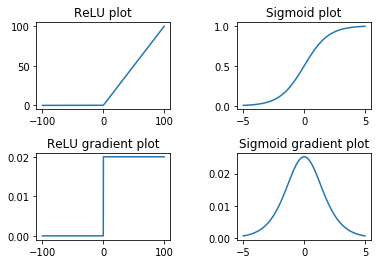

In [5]:
#plotting
#ReLU
x_re = np.linspace(-100, 100, 10000)
y_re = ReLU(x_re)
plt.subplot(221)
plt.plot(x_re, y_re)
plt.title('ReLU plot')

#ReLU derivative
re_grad = np.gradient(y_re)
plt.subplot(223)
plt.plot(x_re, re_grad)
plt.title('ReLU gradient plot')

#Sigmoid
x_sig = np.linspace(-5, 5, 100)
y_sig = sigmoid(x_sig)
plt.subplot(222)
plt.plot(x_sig, y_sig)
plt.title('Sigmoid plot')

#Sigmoid derivative
sig_grad = np.gradient(y_sig)
plt.subplot(224)
plt.plot(x_sig, sig_grad)
plt.title('Sigmoid gradient plot')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

By seeing the plots I would be inclined to say that using ReLU will result in better speed performance since we only need a boolean operation to deliver an output, while calculating sigmoid and its derivative will be computationally more expensive. Using ReLU also allow us to forget about the possible value explotions caused by exponential functions. 

One possible disadvantage could of using ReLU is that for a very wide range of values the activation might not be accurate/representative of the entries diversity. 

## Problem 3: Feedforward Neural Network

<div class="alert alert-block alert-info">
Now that you have created the input matrix, we can implement our neural network and perform a forward propagation to classify intent. To perform the forward propagation, you should compute $z^{l}$ and pass it through the activation function for each layer, given by: <br><br>
$z^{l} = W^{l}a^{l-1} + b^{l}$ <br>
$a^{l} = g(z^{l})$ <br>
where $W^{l}$ is a weight matrix between layer $l$ and $l+1$, $z^{l}$ is value of the hidden layer at layer $l$ before activation, $a^{l}$ is value of the hidden layer at layer $l$ after activation, and $b^{l}$ is bias term for layer $l$.

You should implement the feedforward computation that computes $\hat{y_{i}}$ for every example $i$. The neural network has 3 layers - an input layer, a hidden layer and an output layer, where the hidden layer has 150 neurons. Don't forget to include the bias term. Use ReLU as the activation function for the hidden layer and softmax for the output layer. For parameters initialization, use random values from uniform distribution in the range (-1,1). Provide a seed value to the random number generator, to make the results reproducible. The purpose of using this kind of initialisation is to break symmetry and ensure that different neurons can learn different non-linear functions. (Hint: use vectorization methods instead of a for loop for speedup.) <br><br>

Use this neural network to predict the intent and calculate the accuracy of the classifier. (Should you be expecting high numbers yet?)
<div>

In [6]:
# Student solution here.
np.random.seed(27)
#W2 = second weight matrix of size num_classes=K x d=150 By default random values from uniform distribution in the range (-1,1)
#W1 = first weight matrix of size d=150 x V=voc size. By default random values from uniform distribution in the range (-1,1)
#b2 = first set of biases 150 x 1
W1 = np.random.uniform(-1, 1, (150, V))
b2 = np.random.uniform(-1, 1, 150)
W2 = np.random.uniform(-1, 1, (K, 150))
bL = np.random.uniform(-1, 1, K)

#FfNN = Feedforward Neural Network as described above. Only one hidden layer with 150 neurons by default, first applying ReLU between input and hidden, then softmax between hidden and output
def FfNN(Input, Lab, W1, b2, W2, bL, d=150, probs = 1):
    #Input = Input layer of length n
    #Hidden = hidden layer of length d x 1
    #L list with output labels
    #Output = output layer of length num_classes
    #if probs = 1 then the output will consist of the respective probabilities
    # if probs = 0 the output will be the canonical vector with a 1 in the argmax out the probs/
    np.random.seed(27)
    n = len(Input)

    
    Hidden = ReLU(np.matmul(W1, Input) + b2)
    num_classes = len(Lab)
    W2 = np.random.uniform(-1, 1, (num_classes, d))
    bL = np.random.uniform(-1, 1, num_classes)
    
    Output = softmax(np.matmul(W2, Hidden) + bL)
    if probs == 1:   
        return Output
    elif probs == 0:
        Output = (Output == np.max(Output)).astype(int)
        return Output
    
    
def FfNN_mat(Input_matrix, Lab, W1, b2, W2, bL, probs = 1):
    m, n = Input_matrix.shape
    L = len(Lab)
    sol = np.zeros((L, n))
    for j in range(n):
        sol[:,j] = FfNN(Input_matrix[:,j], Lab,W1, b2, W2, bL, 150, probs)
    return sol

#computing for out B input matrix
#reminder, column j represents the probabilities for the j-th example.
# output_matrix_probs[i][j] = prob of j-th example belonging to the ith category
output_matrix_probs =  FfNN_mat(B, Lab, W1, b2, W2, bL, 1)

#in order to get accuracy we need to compare one hot vectors
output_matrix_hots = FfNN_mat(B, Lab, W1, b2, W2, bL, 0)

In [7]:
#getting accuracy by comparing our results to the previously generated L matrix
#if there is no false in L[:,j] == output_matrix_hots[:,j] then both arrays are identical
#which means success
results = np.array([not False in (L[:,j] == output_matrix_hots[:,j]) for j in range(output_matrix_hots.shape[1])])
accuracy = np.sum(results)/len(results)
accuracy

0.04582210242587601

It is not surprising that we get a terrible accuracy since our parameters where initialized at random and no learning step as yet been implemented. If we had gotten a good accuracy I would be omw to Las Vegas :P

## Problem 4: Backpropagation

<div class="alert alert-block alert-info">
You will now implement the backpropagation algorithm to compute the gradient of the cost function with respect to the neural network weights' and bias term.  First of all, implement the cross entropy loss function to monitor if your model is actually learning. Remember that in backpropagation, we want to propagate the error signal to measure how much each neuron in the hidden layer contributes to the error in the output layer. It is more or less similar to forward propagation but in a reverse direction. For the output layer, set $\delta$ for cross entropy loss: <br><br>
$\delta^{L}= \hat{y} - y$ <br> where $L$ is the output layer and $\hat{y}$ is prediction of $y$. <br>

For the remaining hidden layer $l$, set: <br><br>
$\delta^{l} = (W^{l})^{T}\delta^{l+1} \odot g'(z^{l})$ <br> where $\odot$ is an element-wise product of matrices (Hadamard product), $g'$ is the derivative of the activation function. <br>

The derivative of the ReLU is given by:  $ReLU'(z) = \begin{cases} 1 & \text{if } z > 0 \\
                                                                                                                                      0 & \text{otherwise}.\end{cases}$<br>

By calculating the error term for each layer, you can then use the error term to calculate the partial derivatives $\frac{\partial \mathcal{L}}{\partial W^{l}} = \delta_{l+1} (a^{l})^{T}$ and $\frac{\partial \mathcal{L}}{\partial b^{l}} = \delta_{l+1}$ and perform batch gradient descent to update the parameter. (Batch gradient descent = run through all training instances and compute the gradient, then make the weight update.) Make sure that you accumulate the gradients for all the training samples and divide it by number of samples before doing the update. <br><br>

Here is some simple pseudocode to help with the training procedure: <br>
 * for number of epoch:
    > define gradient accumulator $\Delta w=0, \Delta b=0$ for each weight and bias term <br>
    > define cost accumulator $\Delta \mathcal{L}=0$ for the loss <br>
    
    > for each training example $i$:<br>
        >> perform forward propagation <br>
        >> calculate loss on example $i, L_{i}$ <br>
        >> $\Delta \mathcal{L} = \Delta \mathcal{L} + L_{i}$ <br> <br> 
        >> perform backpropagation <br>
        >> $\Delta w = \Delta w + \frac{\partial \mathcal{L}}{\partial W}$ for each weight <br>
        >> $\Delta b = \Delta b + \frac{\partial \mathcal{L}}{\partial b}$ for each bias term <br> 
        
    > calculate the cost, which is just average loss ($Cost = \frac{1}{m}\Delta \mathcal{L}$) <br>
    > $w = w - \frac{\alpha}{m}\Delta w$ for each weight <br>
    > $b = b - \frac{\alpha}{m}\Delta b$ for each bias term <br> 

Run the training for 1000 epoch using learning rate = 0.005 and use this neural network to predict the intent and calculate the accuracy of the classifier. (Hint: the dimension of $\delta^{l}$ should match the dimension of $a^{l}$, and the dimension of $\frac{\partial \mathcal{L}}{\partial W^{l}}$ and $\frac{\partial \mathcal{L}}{\partial b^{l}}$ should match the dimension of $W^{l}$ and $b^{l}$, respectively).<br><br>

Plot the cost function for each iteration and compare the results after training with results from Problem 3. Discuss what you observe!
<div>

In [32]:
# Student solution here.

#preparing functions we will use
def relu_derivative(M):
    if M.ndim >1: #matrix case
        #applies ReLU_derivative to every element of the input matrix
        #returns a matrix will "Rellued_der" elements
        #making sure that M is a numpy array
        M = np.asarray(M)
        m, n = M.shape
        sol = np.zeros((m, n))
        for i in range(m):
            for j in range(n):
                if M[i][j] >= 0:
                    sol[i][j] = 1
    else: #array case
        sol = np.array([x>=0 for x in M]).astype(int)
    return sol


def output_error(prediction, real):
    #both prediction and real are 1D arrays
    return prediction-real


def hidden_error(weights, output_layer_error, hidden_node_values):
    p1 = np.matmul(weights.transpose(),output_layer_error)
    p2 = relu_derivative(hidden_node_values)
    return p1*p2

#functions to accumulate weight/bias errors
def acc_bias_error(temp_layer_error, bias_index):
    return temp_layer_error[bias_index]

def acc_weight_error(prec_layer, follow_error_layer, follow_index, prec_index):
    return prec_layer[prec_index] * follow_error_layer[follow_index]


In [37]:
#init of all our variables
Lab = np.array(list(unique_intent))
V = len(Voc)
M = len(sentences)
K = len(unique_intent)
np.random.seed(27)
#W2 = second weight matrix of size num_classes=K x d=150 By default random values from uniform distribution in the range (-1,1)
#W1 = first weight matrix of size d=150 x V=voc size. By default random values from uniform distribution in the range (-1,1)
#b2 = first set of biases 150 x 1
W1 = np.random.uniform(-1, 1, (150, V))
b2 = np.random.uniform(-1, 1, 150)
W2 = np.random.uniform(-1, 1, (K, 150))
bL = np.random.uniform(-1, 1, K)
n_epochs = 2
learning_rate = 0.005
costs = []

#tranposing already out bag-of-words and label matrices 
Bt = B.transpose()
Lt = L.transpose()

In [38]:
#training
for epoch in range(n_epochs):
    delta_W1 = np.zeros((150, V))
    delta_b2 = np.zeros(150)
    delta_W2 = np.zeros((K, 150))
    delta_bL = np.zeros(K)
    examples_loss = []
    
    for example_index in range(len(Bt)):
        input_vector = Bt[example_index]
        
        #doing Fforward and getting cross_entr_loss
        softmax_output = FfNN(input_vector, Lab, W1, b2, W2, bL)
        gold_output = Lt[example_index]
        delta_output = output_error(softmax_output, gold_output)
        examples_loss.append(delta_output)
        
        #now getting the error vectors and gradients
        z_hidden = np.matmul(W1, input_vector) + b2
        delta_hidden = hidden_error(W2, delta_output, z_hidden)
        
        #filling the delta matrices
        for i in range(delta_W1.shape[0]):
            for j in range(delta_W1.shape[1]):
                delta_W1[i][j] += acc_weight_error(input_vector, delta_hidden, i, j)
                
        for i in range(delta_W2.shape[0]):
            for j in range(delta_W2.shape[1]):
                delta_W2[i][j] += acc_weight_error(relu_derivative(z_hidden), delta_output, i, j)
        
        for i in range(len(delta_b2)):
            delta_b2[i] += acc_bias_error(delta_hidden, i)
            
        for i in range(len(delta_bL)):
            delta_bL[i] += acc_bias_error(delta_output, i)
            
    costs.append(sum(examples_loss) / len(examples_loss))
    
    #updating weights and biases aka:
    W1 = W1 - (learning_rate*delta_W1/M)
    W2 = W2 - (learning_rate*delta_W2/M)
    b2 = b2 - (learning_rate*delta_b2/M)
    bL = bL - (learning_rate*delta_bL/M)
    
    print('{2} -- Done epoch {0} of {1}'.format(epoch+1, n_epochs, datetime.now().strftime("%Y-%m-%d %H:%M:%S")))

2019-12-18 15:44:33 -- Done epoch 1 of 2
2019-12-18 15:50:42 -- Done epoch 2 of 2


Because of time reasons we only computed two epochs, which resulted in a very poor graph and is not enough to conclude that our network is properly training.

## Bonus: Mini-Batch and Stochastic Gradient Descent

<div class="alert alert-block alert-info">
As a bonus, train the neural network using mini-batch gradient descent with batch size = 64 and stochastic gradient descent (i.e., batch size = 1) for 1000 epoch using learning rate = 0.005. Plot the cost vs iteration for both cases and briefly discuss your observation!  
<div>

In [ ]:
# Student solution here.

#For the Mini-Batch approach we can copy our previous try and add the sampling step before starting training

#MINI-Batches


#training
for epoch in range(n_epochs):
    delta_W1 = np.zeros((150, V))
    delta_b2 = np.zeros(150)
    delta_W2 = np.zeros((K, 150))
    delta_bL = np.zeros(K)
    examples_loss = []
    mini_indices = np.random.randint(len(Bt), 64) #MINI VERSION
    B_mini = Bt[mini_indices, :] #MINI VERSION
    for example_index in range(len(B_mini)): #MINI VERSION
        input_vector = Bt[example_index]
        
        #doing Fforward and getting cross_entr_loss
        softmax_output = FfNN(input_vector, Lab, W1, b2, W2, bL)
        gold_output = Lt[example_index]
        delta_output = output_error(softmax_output, gold_output)
        examples_loss.append(delta_output)
        
        #now getting the error vectors and gradients
        z_hidden = np.matmul(W1, input_vector) + b2
        delta_hidden = hidden_error(W2, delta_output, z_hidden)
        
        #filling the delta matrices
        for i in range(delta_W1.shape[0]):
            for j in range(delta_W1.shape[1]):
                delta_W1[i][j] += acc_weight_error(input_vector, delta_hidden, i, j)
                
        for i in range(delta_W2.shape[0]):
            for j in range(delta_W2.shape[1]):
                delta_W2[i][j] += acc_weight_error(relu_derivative(z_hidden), delta_output, i, j)
        
        for i in range(len(delta_b2)):
            delta_b2[i] += acc_bias_error(delta_hidden, i)
            
        for i in range(len(delta_bL)):
            delta_bL[i] += acc_bias_error(delta_output, i)
            
    costs.append(sum(examples_loss) / len(examples_loss))
    
    #updating weights and biases aka:
    W1 = W1 - (learning_rate*delta_W1/M)
    W2 = W2 - (learning_rate*delta_W2/M)
    b2 = b2 - (learning_rate*delta_b2/M)
    bL = bL - (learning_rate*delta_bL/M)
    
    print('{2} -- Done epoch {0} of {1}'.format(epoch+1, n_epochs, datetime.now().strftime("%Y-%m-%d %H:%M:%S")))

In [ ]:
#Stocastic Batch version
#same as before but now sampling only one row per epoch

#training
for epoch in range(n_epochs):
    delta_W1 = np.zeros((150, V))
    delta_b2 = np.zeros(150)
    delta_W2 = np.zeros((K, 150))
    delta_bL = np.zeros(K)
    examples_loss = []
    mini_indices = np.random.randint(len(Bt)) #Stocastic VERSION
    B_mini = Bt[mini_indices, :] #Stoch VERSION
    for example_index in range(len(B_mini)): #Stoch VERSION
        input_vector = Bt[example_index]
        
        #doing Fforward and getting cross_entr_loss
        softmax_output = FfNN(input_vector, Lab, W1, b2, W2, bL)
        gold_output = Lt[example_index]
        delta_output = output_error(softmax_output, gold_output)
        examples_loss.append(delta_output)
        
        #now getting the error vectors and gradients
        z_hidden = np.matmul(W1, input_vector) + b2
        delta_hidden = hidden_error(W2, delta_output, z_hidden)
        
        #filling the delta matrices
        for i in range(delta_W1.shape[0]):
            for j in range(delta_W1.shape[1]):
                delta_W1[i][j] += acc_weight_error(input_vector, delta_hidden, i, j)
                
        for i in range(delta_W2.shape[0]):
            for j in range(delta_W2.shape[1]):
                delta_W2[i][j] += acc_weight_error(relu_derivative(z_hidden), delta_output, i, j)
        
        for i in range(len(delta_b2)):
            delta_b2[i] += acc_bias_error(delta_hidden, i)
            
        for i in range(len(delta_bL)):
            delta_bL[i] += acc_bias_error(delta_output, i)
            
    costs.append(sum(examples_loss) / len(examples_loss))
    
    #updating weights and biases aka:
    W1 = W1 - (learning_rate*delta_W1/M)
    W2 = W2 - (learning_rate*delta_W2/M)
    b2 = b2 - (learning_rate*delta_b2/M)
    bL = bL - (learning_rate*delta_bL/M)
    
    print('{2} -- Done epoch {0} of {1}'.format(epoch+1, n_epochs, datetime.now().strftime("%Y-%m-%d %H:%M:%S")))

Because of time limitations I was not able to try these methods but my guess is that that they will go through all epochs much faster (as they only have to do a small fraction of the previous number of calculations). 

In the case in which we go through all the examples each epoch will probably result in a smooth minimization of the cost each epoch, while in the sampling methods we will likely find periods for which the cost increazed between epochs but we will also observe a general decreasing trend (hopefully).